# Pandas

In [1]:
import pandas as pd

data = [[ 0.990360, -1.131429, -1.065981,  0.855488],
        [ 0.493665,  0.589660, -0.432106, -0.240378],
        [-0.807992, -1.794176, -1.210304,  0.201295],
        [-0.270479, -1.121976,  0.459273, -0.178025],
        [ 0.188286, -0.931686,  1.959219,  0.387350],
        [ 2.252443,  0.848532,  0.925256,  1.014754]]

df = pd.DataFrame(data, columns=list('ABCD'))

In [4]:
df.head(10)

,A,B,C,D
0,0.990360,-1.131429,-1.065981,0.855488
1,0.493665,0.589660,-0.432106,-0.240378
2,-0.807992,-1.794176,-1.210304,0.201295
3,-0.270479,-1.121976,0.459273,-0.178025
4,0.188286,-0.931686,1.959219,0.387350
5,2.252443,0.848532,0.925256,1.014754


## Мета-информация

In [6]:
df = pd.DataFrame({
    'A': 1.1,
    'B': pd.Timestamp('20200901'),
    'C': 111,
    'D': [42 * i  for i in range(4)],
    'E': 'foo'
})

df.head()

,A,B,C,D,E
0,1.1,2020-09-01,111,0,foo
1,1.1,2020-09-01,111,42,foo
2,1.1,2020-09-01,111,84,foo
3,1.1,2020-09-01,111,126,foo


In [71]:
df.dtypes

A           float64
B    datetime64[ns]
C             int64
D             int64
E            object
dtype: object

In [72]:
df.columns

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [73]:
# Индекс - это iterable объект, который задает форму обращения к строкам
# По дефолту создается целочисленный индекс

df.index

RangeIndex(start=0, stop=4, step=1)

In [7]:
# мы можем создать DataFrame с кастомным индексом
# элементы iterable должны быть хэшируемыми

df = pd.DataFrame({
    'A': 1.1,
    'B': pd.Timestamp('20200901'),
    'C': 111,
    'D': [42 * i  for i in range(4)],
    'E': 'foo'
}, index=['M', 'N', 'K', 'O'])


In [8]:
df.index

Index(['M', 'N', 'K', 'O'], dtype='object')

In [9]:
df.index[[True, False, False, True]]

Index(['M', 'O'], dtype='object')

## Индексация и выборка данных

In [12]:
data = [[ 0.990360, -1.131429, -1.065981,  0.855488],
        [ 0.493665,  0.589660, -0.432106, -0.240378],
        [-0.807992, -1.794176, -1.210304,  0.201295],
        [-0.270479, -1.121976,  0.459273, -0.178025],
        [ 0.188286, -0.931686,  1.959219,  0.387350],
        [ 2.252443,  0.848532,  0.925256,  1.014754]]

df = pd.DataFrame(data, columns=list('ABCD'))

In [13]:
# для обращения к ячейкам фрейма служит метод loc

print(df.loc[0,'A'])

0.99036


In [14]:
# Создадим новый фрейм из тех же данных,
# но индекс теперь будет нестандартный

dates = pd.date_range('20200101', periods=6)
df2 = pd.DataFrame(data, index=dates, columns=list('ABCD'))

df2.head()

,A,B,C,D
2020-01-01,0.990360,-1.131429,-1.065981,0.855488
2020-01-02,0.493665,0.589660,-0.432106,-0.240378
2020-01-03,-0.807992,-1.794176,-1.210304,0.201295
2020-01-04,-0.270479,-1.121976,0.459273,-0.178025
2020-01-05,0.188286,-0.931686,1.959219,0.387350


In [15]:
# теперь для обращения к ячейке требуется указывать элемент индекса

# так мы получим KeyError
# print(df2.loc[0, 'A'])

# а так все сработает
print(df2.loc['20200101','A'])

0.99036


In [16]:
data = [[ 0.990360, -1.131429, -1.065981,  0.855488],
        [ 0.493665,  0.589660, -0.432106, -0.240378],
        [-0.807992, -1.794176, -1.210304,  0.201295],
        [-0.270479, -1.121976,  0.459273, -0.178025],
        [ 0.188286, -0.931686,  1.959219,  0.387350],
        [ 2.252443,  0.848532,  0.925256,  1.014754]]

df = pd.DataFrame(data, columns=list('ABCD'))

In [81]:
# Индексация по фрэйму чем-то схожа с индексацией в numpy

# так можно выбрать строчки cо второй по четвертую
df.loc[1:3]

,A,B,C,D
1,0.493665,0.589660,-0.432106,-0.240378
2,-0.807992,-1.794176,-1.210304,0.201295
3,-0.270479,-1.121976,0.459273,-0.178025


In [82]:
# все строки, столбцы C и D 
df.loc[:, ['C', 'D']]

,C,D
0,-1.065981,0.855488
1,-0.432106,-0.240378
2,-1.210304,0.201295
3,0.459273,-0.178025
4,1.959219,0.387350
5,0.925256,1.014754


In [83]:
# Строки через одну, столбцы C и D 

df.loc[::2, ['C', 'D']]

,C,D
0,-1.065981,0.855488
2,-1.210304,0.201295
4,1.959219,0.387350


In [17]:
# iloc - это integer loc. Буквально

# Аналогом операции выше при использовании iloc будет
df.iloc[::2, [2, 3]]

,C,D
0,-1.065981,0.855488
2,-1.210304,0.201295
4,1.959219,0.387350


In [85]:
# Также есть операции .at и .iat, 
# Они позволяют максимально быстро достучаться до скаляра

df.iat[2, 3]

0.201295

In [18]:
# с помощью .loc и .iloc можно менять элементы фрейма

# например, одну ячейку
df.iat[2, 3] = 42
df.head()

,A,B,C,D
0,0.990360,-1.131429,-1.065981,0.855488
1,0.493665,0.589660,-0.432106,-0.240378
2,-0.807992,-1.794176,-1.210304,42.000000
3,-0.270479,-1.121976,0.459273,-0.178025
4,0.188286,-0.931686,1.959219,0.387350


In [19]:
df.iloc[:, 3] = [i for i in range(6)]
df.head()

,A,B,C,D
0,0.990360,-1.131429,-1.065981,0
1,0.493665,0.589660,-0.432106,1
2,-0.807992,-1.794176,-1.210304,2
3,-0.270479,-1.121976,0.459273,3
4,0.188286,-0.931686,1.959219,4


In [32]:
from copy import deepcopy

test = deepcopy(df.loc[1, :])

In [33]:
test

A    0.493665
B    0.589660
C   -0.432106
D    1.000000
Name: 1, dtype: float64

In [30]:
test.loc[3] = 1

In [31]:
test.dtypes

dtype('float64')

In [34]:
# при этом у столбца внезапно поменялся тип данных
df.dtypes

A    float64
B    float64
C    float64
D      int64
dtype: object

#### Выборка данных по маске

In [38]:
data = [[ 0.990360, -1.131429, -1.065981,  0.855488],
        [ 0.493665,  0.589660, -0.432106, -0.240378],
        [-0.807992, -1.794176, -1.210304,  0.201295],
        [-0.270479, -1.121976,  0.459273, -0.178025],
        [ 0.188286, -0.931686,  1.959219,  0.387350],
        [ 2.252443,  0.848532,  0.925256,  1.014754]]

df = pd.DataFrame(data, columns=list('ABCD'))

In [39]:
type(df['D'] > 0)

pandas.core.series.Series

In [40]:
# так можно выбрать те строки таблицы, для которых поле 'D' больше нуля
df[df['D'] > 0]

,A,B,C,D
0,0.990360,-1.131429,-1.065981,0.855488
2,-0.807992,-1.794176,-1.210304,0.201295
4,0.188286,-0.931686,1.959219,0.387350
5,2.252443,0.848532,0.925256,1.014754


In [112]:
type(df[df['D'] > 0])

pandas.core.frame.DataFrame

In [113]:
df[df['D'] > 0].loc[:, 'D']

0    0.855488
2    0.201295
4    0.387350
5    1.014754
Name: D, dtype: float64

In [114]:
# присвоение при этом не сработает, т.к. df[df['D'] > 0] возвращает копию
df[df['D'] > 0].loc[:, 'D'] = 0.

/home/andrey/PG/python-3rd-term-seminars/python-3rd-term/env/lib/python3.6/site-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [41]:
# можно по другому
df.loc[df['D'] > 0, 'D'] = 0.
df.head()

,A,B,C,D
0,0.990360,-1.131429,-1.065981,0.000000
1,0.493665,0.589660,-0.432106,-0.240378
2,-0.807992,-1.794176,-1.210304,0.000000
3,-0.270479,-1.121976,0.459273,-0.178025
4,0.188286,-0.931686,1.959219,0.000000


## Больше полезных операций

#### Сортировка

In [42]:
data = {'A': 1.1,
        'B': pd.Timestamp('20200901'),
        'C': 111,
        'D': [42 * i  for i in range(4)],
        'E': 'foo'}

df = pd.DataFrame(data)

In [43]:
# Так мы получим отсортированную по столбцу 'D' копию фрэйма

df.sort_values(by='D', ascending=False)

,A,B,C,D,E
3,1.1,2020-09-01,111,126,foo
2,1.1,2020-09-01,111,84,foo
1,1.1,2020-09-01,111,42,foo
0,1.1,2020-09-01,111,0,foo


In [44]:
# С помощью флага inplace можно добиться модификации исходного фрэйма

df.sort_values(by='D', ascending=False, inplace=True)
df.head()

,A,B,C,D,E
3,1.1,2020-09-01,111,126,foo
2,1.1,2020-09-01,111,84,foo
1,1.1,2020-09-01,111,42,foo
0,1.1,2020-09-01,111,0,foo


#### Заполнение пропусков

In [130]:
data = {'A': 1.1,
        'B': pd.Timestamp('20200901'),
        'C': 111,
        'D': [42 * i  for i in range(4)],
        'E': 'foo'}

df = pd.DataFrame(data)

df.loc[1:2, 'F'] = 'test'
df.head()

,A,B,C,D,E,F
0,1.1,2020-09-01,111,0,foo,NaN
1,1.1,2020-09-01,111,42,foo,test
2,1.1,2020-09-01,111,84,foo,test
3,1.1,2020-09-01,111,126,foo,NaN


In [45]:
df.fillna(value='bar', inplace=True)
df.head()

,A,B,C,D,E
3,1.1,2020-09-01,111,126,foo
2,1.1,2020-09-01,111,84,foo
1,1.1,2020-09-01,111,42,foo
0,1.1,2020-09-01,111,0,foo


#### Статистики фрейма

Pandas поддерживает подсчет стандартных функций, использующихся для стат.анализа выборок данных

In [49]:
target = df.loc[df['D'] > 0, 'D']
target

3    126
2     84
1     42
Name: D, dtype: int64

In [50]:
target.min()

42

In [51]:
target.max()

126

In [52]:
target.median()

84.0

In [53]:
target.mean()

84.0

In [146]:
target.quantile(.9)

117.60000000000001

In [147]:
target.quantile(.1)

50.400000000000006

In [149]:
# к фрэйму в принципе можно применять все что угодно
# (до тех пор, пока операции над типами данных определены)
# быстро ли это - вопрос другой

print(df.loc[:,['A', 'C', 'D']].apply(lambda x: x**2))

      A      C      D
0  1.21  12321      0
1  1.21  12321   1764
2  1.21  12321   7056
3  1.21  12321  15876


## SQL в Pandas

#### join

In [165]:
import pandas as pd

# У нас есть данные из разных источников, которые хочется склеить по ключу
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [166]:
left.head()

,key,lval
0,foo,1
1,bar,2


In [167]:
right.head()

,key,rval
0,foo,4
1,bar,5


In [168]:
# слить данные по столбцу можно так
pd.merge(left, right, on='key').head()

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [169]:
right2 = pd.DataFrame({'key': ['foo', 'baz'], 'rval': [4, 5]})
right2.head()

,key,rval
0,foo,4
1,baz,5


In [170]:
# такая операция - аналог inner join из SQL
# все строки, в которых ключи не мэтчатся, отсеиваются
pd.merge(left, right2, on='key').head()

,key,lval,rval
0,foo,1,4


In [171]:
# чтобы указать тип merge, есть параметр how
pd.merge(left, right2, on='key', how='outer').head()

,key,lval,rval
0,foo,1.0,4.0
1,bar,2.0,NaN
2,baz,NaN,5.0


#### Агрегатные функции и groupby

In [60]:
import pandas as pd

df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': [i for i in range(8)],
                   'D': [i**2 for i in range(8)]})

df.head()

,A,B,C,D
0,foo,one,0,0
1,bar,one,1,1
2,foo,two,2,4
3,bar,three,3,9
4,foo,two,4,16


In [61]:
df.groupby('A').groups

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [65]:
df.groupby('A').quantile(0.9)

,C,D
A,,
bar,4.6,21.8
foo,6.6,43.8


In [69]:
import seaborn as sns

iris = sns.load_dataset("iris")

In [81]:
len(iris)

150

In [75]:
iris.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


## Визуализация

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': [i for i in range(8)],
                   'D': [i**2 for i in range(8)]})

df.head(10)

,A,B,C,D
0,foo,one,0,0
1,bar,one,1,1
2,foo,two,2,4
3,bar,three,3,9
4,foo,two,4,16
5,bar,two,5,25
6,foo,one,6,36
7,foo,three,7,49


            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             250.3        171.4          73.1         12.3
versicolor         296.8        138.5         213.0         66.3
virginica          329.4        148.7         277.6        101.3


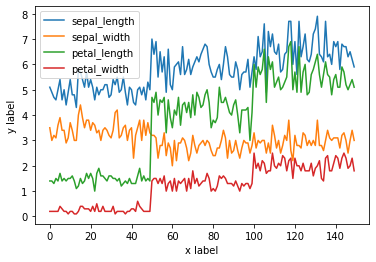

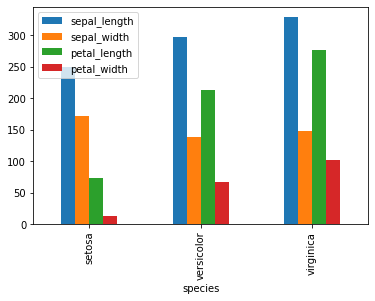

In [80]:
# Можно взять и нарисовать фрейм
ax = iris.plot()
ax.set_xlabel('x label')
ax.set_ylabel('y label')

print("=================")

# А потом посчитать агрегаты
aggr = iris.groupby('species').sum()
print(aggr)

# И их тоже нарисовать
ax2 = aggr.plot(kind='bar')

plt.show()

In [78]:
# много прикольных визуализаций можно сделать с помощью библиотеки seaborn

## Чтение .csv файлов

In [82]:
import pandas as pd

df = pd.read_csv("data.csv", index_col='num')

print(df)

print("=================")

print(df.groupby('A').sum())

       A      B  C         D
num                         
0    foo    one  0  0.784768
1    bar    one  1  0.944118
2    foo    two  2  0.230714
3    bar  three  3  0.367531
4    foo    two  4  0.836350
5    bar    two  5  0.521741
6    foo    one  6  0.026876
7    foo  three  7  0.671219
      C         D
A                
bar   9  1.833390
foo  19  2.549927


In [85]:
iris.to_csv('iris.csv')